In [1]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 3s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [5]:
#because we only have 10000 words index will be9999
max([max(ssequence) for ssequence in train_data])

9999

In [6]:
#decode it
word_index=imdb.get_word_index() #maps words to index in dict
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()]) #reverses the indexing

1641221/1641221 [==============================] - 1s 1us/step


In [8]:
decoded_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]]) #adds the padding

In [9]:
#preparing the data 
#-- we cannot directly feed data in form of tensors not in the form of integers
#--we will target to put it in 2d tensor like (sample word,wordindices)

In [10]:
#then we on hot encode it and turn them in to 0s and 1s

In [21]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension)) # create all 0matrix
    for i,sequence in enumerate(sequences): #eneumerate keeps a count on the oterations taku=inf=g place
        results[i,sequence]=1 #change several to 1
    return results


 wth is actually happening ????

from dict we have for ex
word      word_id
I      -> 0
you    -> 1
he     -> 2
be     -> 3
eat    -> 4
happy  -> 5
sad    -> 6
banana -> 7
a      -> 8


we do this to vectorize

I be happy      -> [0,3,5]   -> [1,0,0,1,0,1,0,0,0]
I eat a banana. -> [0,4,8,7] -> [1,0,0,0,1,0,0,1,1]

In [26]:
""" word      word_id
I      -> 0
you    -> 1
he     -> 2
be     -> 3
eat    -> 4
happy  -> 5
sad    -> 6
banana -> 7
a      -> 8

I be happy      -> [0,3,5]   -> [1,0,0,1,0,1,0,0,0]
I eat a banana. -> [0,4,8,7] -> [1,0,0,0,1,0,0,1,1] """

' word      word_id\nI      -> 0\nyou    -> 1\nhe     -> 2\nbe     -> 3\neat    -> 4\nhappy  -> 5\nsad    -> 6\nbanana -> 7\na      -> 8\n\nI be happy      -> [0,3,5]   -> [1,0,0,1,0,1,0,0,0]\nI eat a banana. -> [0,4,8,7] -> [1,0,0,0,1,0,0,1,1] '

In [22]:
#vectorixe everything literally everything even the labels :))

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [23]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [24]:
#vectorize the labels
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [25]:
""" Build the network noww

use dense because the input dat is in vectors and labels are scalers
dont use so many hidden layers-- coz it may lead to wrong patterns
 """

' Build the network noww\n\nuse dense because the input dat is in vectors and labels are scalers\ndont use so many hidden layers-- coz it may lead to wrong patterns\n '

In [27]:
""" we use 2 intermediate layers with 16 hidden units i.e wrt to the weight matrix will have 16by 16 16 d space will be created -- relu

a third ;ayer will output thr scalar prediccrion regarding the sentoment analysis -- sigmoid coz only between 0 and 1 will be the output """


' we use 2 intermediate layers with 16 hidden units i.e wrt to the weight matrix will have 16by 16 16 d space will be created -- relu\n\na third ;ayer will output thr scalar prediccrion regarding the sentoment analysis -- sigmoid coz only between 0 and 1 will be the output '

In [28]:
""" it is a binary classification problem we use binary cross entropy
--coz output in form of probanbilities
use mean squared error """

' it is a binary classification problem we use binary cross entropy\n--coz output in form of probanbilities\nuse mean squared error '

In [29]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
#configure the metrics with the prameters required
from keras import losses
from keras import metrics
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [33]:
#make a validiation set--- we have laready used the first 10k for the training process remove thme and use the next 10k from the datset to validiate the data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
""" model.fit return history object
this object has member history """

In [34]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 157ms/step - loss: 0.5728 - acc: 0.7445 - val_loss: 0.4660 - val_acc: 0.8228
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3845 - acc: 0.8832 - val_loss: 0.3762 - val_acc: 0.8694
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2848 - acc: 0.9121 - val_loss: 0.3074 - val_acc: 0.8851
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2275 - acc: 0.9282 - val_loss: 0.3034 - val_acc: 0.8824
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1847 - acc: 0.9441 - val_loss: 0.3572 - val_acc: 0.8551
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1605 - acc: 0.9499 - val_loss: 0.2951 - val_acc: 0.8812
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1369 - acc: 0.9583 - val_loss: 0.2891 - val_acc: 0.8858
Epoch 8/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1165 - 

In [35]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.5467 - acc: 0.8612


In [36]:
results

[0.5467485189437866, 0.8611599802970886]

In [37]:
#analyssis of history;}
dict=history.history
dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [38]:
import matplotlib.pyplot as plt
lossvalues=dict['loss']
vallossvalues=dict['val_loss']

In [40]:
acc=dict['acc']
epochs=range(1,len(acc)+1)

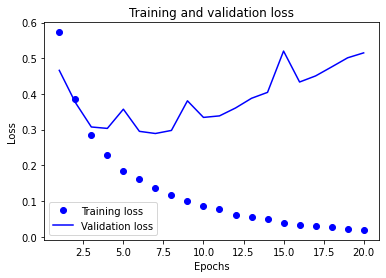

In [42]:
plt.plot(epochs, lossvalues, 'bo', label='Training loss')
plt.plot(epochs, vallossvalues, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

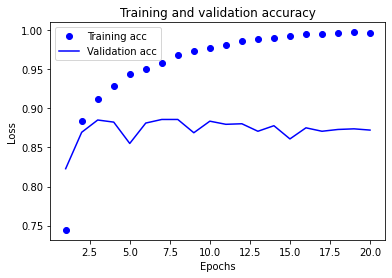

In [45]:
acc_values = dict['acc']
val_acc_values = dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
model.predict(x_test)

782/782 [==============================] - 3s 2ms/step


array([[0.02459882],
       [1.        ],
       [0.9960524 ],
       ...,
       [0.01127768],
       [0.02467704],
       [0.9551693 ]], dtype=float32)